In [3]:
import sys
sys.path.append('cocoapi\PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from torchvision import transforms
from torchvision.utils import make_grid, save_image
# TODO #1: Define a transform to pre-process the testing images.
transform_test = transforms.Compose([ 
    transforms.Resize(256),                          
    transforms.CenterCrop(224),                             
    transforms.ToTensor(),                           
    transforms.Normalize((0.485, 0.456, 0.406),      
                         (0.229, 0.224, 0.225))])

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Create the data loader.
data_loader = get_loader(transform=transform_test, mode='test')

Vocabulary successfully loaded from vocab.pkl file!


In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
def get_prediction():
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
#     print(features)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)
    return features

def clean_sentence(output):
    sentence = ""
    for idx in output:
        if idx == 0:
            continue
        if idx == 1:
            break
        word = data_loader.dataset.vocab.idx2word[idx]
        sentence = sentence + word + ' '
        
    return sentence

def fetch_image(file_name):
    orig_image = Image.open(file_name).convert('RGB')
#     plt.imshow(np.squeeze(orig_image))
#     plt.title('Sample Image')
    plt.show()
    transform_test = transforms.Compose([ 
        transforms.Resize(256),                          
        transforms.CenterCrop(224),                             
        transforms.ToTensor(),                           
        transforms.Normalize((0.485, 0.456, 0.406),      
                             (0.229, 0.224, 0.225))])
    input_image = transform_test(orig_image)
    return orig_image, input_image

def generate_caption(input_image,encoder):
    print(input_image.shape)
    features = encoder(input_image).unsqueeze(1)
    features.to(device)
#     print(features.shape)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

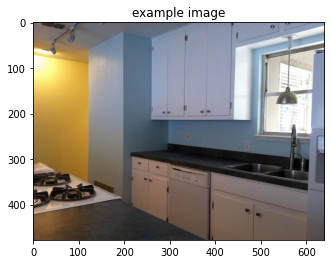

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
orig_image, image = next(iter(data_loader))

# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()

In [3]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
%load_ext autoreload
%autoreload 2

import os
import torch
from model import EncoderCNN, DecoderRNN

# TODO #2: Specify the saved models to load.
encoder_file = 'encoder-1.pkl'
decoder_file = 'decoder-1.pkl'

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()
print(os.getcwd())
address = os.path.join(os.getcwd(),'models', encoder_file)
print(address)
# Load the trained weights.
encoder.load_state_dict(torch.load(address))
decoder.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', decoder_file)))

# Move models to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)

9 2048
C:\Users\ACER\PycharmProjects\firstTest\Image-Captioning-master
C:\Users\ACER\PycharmProjects\firstTest\Image-Captioning-master\models\encoder-1.pkl


DecoderRNN(
  (word_embeddings): Embedding(10321, 512)
  (embed): Embedding(10321, 512)
  (lstm): LSTM(512, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=10321, bias=True)
)

a white bird sitting on top of a branch . 


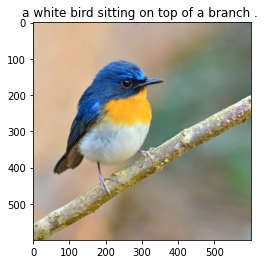

In [5]:
file_name_1 = 'bird.jpg'
address_1 = os.path.join(os.getcwd(),'images',file_name_1)
orig_image_1, input_image_1 = fetch_image(address_1)
temp_v_features_1 = encoder(input_image_1.reshape(1,3,224,224).to('cuda')).unsqueeze(1)
decoder_output_1,_,_ = decoder_1.sample(temp_v_features.to(device))
plt.title(clean_sentence(decoder_output_1))
plt.imshow(orig_image_1)
print(clean_sentence(decoder_output_1))

a plate of food with meat and vegetables . 


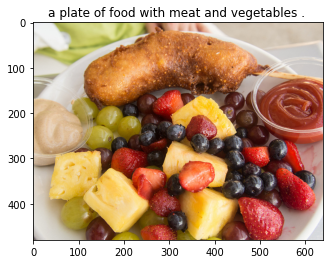

In [6]:
file_name_2 = 'fruits.jpg'
address_2 = os.path.join(os.getcwd(),'images',file_name_2)
orig_image_2, input_image_2 = fetch_image(address_2)
temp_v_features_2 = encoder(input_image_2.reshape(1,3,224,224).to('cuda')).unsqueeze(1)
decoder_output_2,_,_ = decoder.sample(temp_v_features_2.to(device))
plt.title(clean_sentence(decoder_output_2))
plt.imshow(orig_image_2)
print(clean_sentence(decoder_output_2))

a cat sitting on top of a couch next to a remote control . 


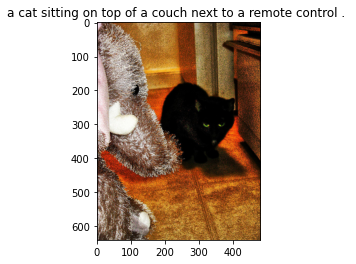

In [7]:
file_name_3 = 'cat.jpg'
address_3 = os.path.join(os.getcwd(),'images',file_name_3)
orig_image_3, input_image_3 = fetch_image(address_3)
temp_v_features_3 = encoder(input_image_3.reshape(1,3,224,224).to('cuda')).unsqueeze(1)
decoder_output_3,_,_ = decoder.sample(temp_v_features_3.to(device))
plt.title(clean_sentence(decoder_output_3))
plt.imshow(orig_image_3)
print(clean_sentence(decoder_output_3))

In [2]:
file_name_4 = 'water-bird.JPEG'
address_4 = os.path.join(os.getcwd(),'images',file_name_4)
orig_image_4, input_image_4 = fetch_image(address_4)
temp_v_features_4 = encoder(input_image_4.reshape(1,3,224,224).to('cuda')).unsqueeze(1)
decoder_output_4,_,_ = decoder.sample(temp_v_features_4.to(device))
plt.title(clean_sentence(decoder_output_4))
plt.imshow(orig_image_4)
print(clean_sentence(decoder_output_4))

NameError: name 'os' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


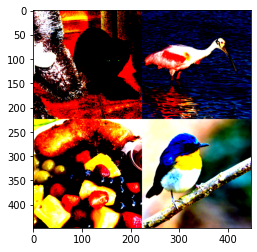

In [10]:
concat_image = torch.cat((input_image_3,input_image_4),2)
concat_image_2 = torch.cat((input_image_2,input_image),2)
final_image = torch.cat((concat_image,concat_image_2),1)

plt.imshow(final_image.permute(1, 2, 0))
save_image(final_image, 'super1.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


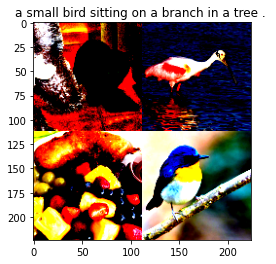

In [33]:
temp_transform = transforms.Resize(224)
final_image = temp_transform(final_image)

v_features = encoder(final_image.reshape(1,3,224,224).to('cuda')).unsqueeze(1)
# torchvision.transforms.Resize([size])(img)
f_decoder_output,_,_ = decoder.sample(v_features.to(device))
plt.title(clean_sentence(f_decoder_output))
plt.imshow(final_image.permute(1, 2, 0))
save_image(final_image, 'img1.png')

In [82]:
import pandas as pd

predicted_sentence,predicted_scores,predicted_indices = decoder.sample(v_features.to(device))

word_list = []
for t in range(0,20):
    for w in range(0,5):
        word = data_loader.dataset.vocab.idx2word[predicted_indices[t][0][w].item()]
        if word not in word_list:
            word_list.append(word)

word_indx_list = []
for word in word_list:
    word_indx_list.append(data_loader.dataset.vocab.word2idx[word])


myDataFrame = pd.DataFrame(columns = word_list)

for t in range(0,20):
    print(f'time = {t}')
    print(predicted_indices[t][0])
    print(predicted_scores[t][0])
    for w_indx in word_indx_list:
        if w_indx in predicted_indices[t][0]:
            index = (predicted_indices[t][0]==w_indx).nonzero().item()
            print(index)
            score = predicted_scores[t][0][index].item()
        else:
            score = 0
        key_word = data_loader.dataset.vocab.idx2word[w_indx]

        myDataFrame.loc[t,key_word] = score

myDataFrame.transpose().to_csv("decoder_layer_Scores_"+"bmgd_"+".csv")
print(clean_sentence(predicted_sentence))

time = 0
tensor([    0, 10088,  1567,   328,  9395], device='cuda:0')
tensor([31.0016,  5.2079,  4.3014,  4.0891,  4.0457], device='cuda:0',
       grad_fn=<SelectBackward0>)
0
1
2
3
4
time = 1
tensor([  3,  57, 263,   9, 243], device='cuda:0')
tensor([10.6838,  8.8510,  7.5781,  7.5547,  6.9682], device='cuda:0',
       grad_fn=<SelectBackward0>)
0
1
2
3
4
time = 2
tensor([194, 113, 145, 350, 266], device='cuda:0')
tensor([10.4061, 10.2727,  9.2439,  9.0486,  8.8559], device='cuda:0',
       grad_fn=<SelectBackward0>)
0
1
2
3
4
time = 3
tensor([116,  35,  39,  16, 146], device='cuda:0')
tensor([9.4162, 8.8512, 8.2328, 8.2283, 7.6982], device='cuda:0',
       grad_fn=<SelectBackward0>)
0
1
2
3
4
time = 4
tensor([ 49,  39, 107,  97, 259], device='cuda:0')
tensor([12.9123, 10.5357,  9.2577,  8.6217,  8.4479], device='cuda:0',
       grad_fn=<SelectBackward0>)
1
0
2
3
4
time = 5
tensor([  3, 173,   9, 232,  61], device='cuda:0')
tensor([11.9881, 10.4119, 10.2731,  8.3751,  7.2402], device